# Analysis and Visualization of PISA 2012 Dataset
## by Debasree Banerjee

## Preliminary Wrangling

> The Programme for International Student Assessment (PISA) is a worldwide study which examines the skills of 15-years old students from around the world. It is developed by the Organisation for Economic Co-operation and Development (OECD). The study analyzes students' mathematics, science and reading skills and contain information about the students' background, schools and the organisation of education systems. It is not a conventional school test. Rather than examining how well students have learned the school curriculum, it looks at how well prepared they are for life beyond school.

> Around 510,000 students in 65 economies took part in the PISA 2012 assessment of reading, mathematics and science representing about 28 million 15-year-olds globally. Of those economies, 44 took part in an assessment of creative problem solving and 18 in an assessment of financial literacy.

>After looking at the data dictionary I have selected the variables, which I think are needed for the analysis. The file with the selected columns is uploaded here. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# read the file with selected columns needed for the analysis
df = pd.read_csv('pisa2012_Select.csv')

In [3]:
df.head()

,CNT,ST03Q02,ST04Q01,AGE,COBN_F,COBN_M,COBN_S,LMINS,MMINS,SMINS,...,PV1READ,PV2READ,PV3READ,PV4READ,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE
0,Albania,1996,Female,16.17,Albania,Albania,Albania,NaN,NaN,NaN,...,249.5762,254.3420,406.8496,175.7053,218.5981,341.7009,408.8400,348.2283,367.8105,392.9877
1,Albania,1996,Female,16.17,Albania,Albania,Albania,315.0,270.0,90.0,...,406.2936,349.8975,400.7334,369.7553,396.7618,548.9929,471.5964,471.5964,443.6218,454.8116
2,Albania,1996,Female,15.58,Albania,Albania,Albania,300.0,NaN,NaN,...,401.2100,404.3872,387.7067,431.3938,401.2100,499.6643,428.7952,492.2044,512.7191,499.6643
3,Albania,1996,Female,15.67,Albania,Albania,Albania,135.0,135.0,90.0,...,547.3630,481.4353,461.5776,425.0393,471.9036,438.6796,481.5740,448.9370,474.1141,426.5573
4,Albania,1996,Female,15.50,Albania,Albania,Albania,NaN,NaN,NaN,...,311.7707,141.7883,293.5015,272.8495,260.1405,361.5628,275.7740,372.7527,403.5248,422.1746


In [4]:
df.shape

(485490, 26)

### The structure of the PISA 2012 dataset

> The revised dataset consists of 26 columns with 485490 entries.

### The main feature(s) of interest in the dataset

> I am curious to know from this dataset student of which countries performed best in Maths, Science and Reading. Also, I am curious to know what other factors influence the Maths, Science and Reading score of the students.

### The features in the dataset that will help support the investigation into the feature(s) of interest

> To analyze how individual countries perform, I will check the average world and country-wise distribution of the Maths, Science and Reading score.

> To analyze how other factors influence the score, I will check the distribution the score of each subject across different factors like cultural background and learning time.

## Further Data Wrangling

> Further Data Wrangling is needed to clean and tidy the pisa2012_Select.csv dataset.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 26 columns):
CNT        485490 non-null object
ST03Q02    485490 non-null int64
ST04Q01    485490 non-null object
AGE        485374 non-null float64
COBN_F     481825 non-null object
COBN_M     481843 non-null object
COBN_S     481836 non-null object
LMINS      282866 non-null float64
MMINS      283303 non-null float64
SMINS      270914 non-null float64
WEALTH     479597 non-null float64
PV1MATH    485490 non-null float64
PV2MATH    485490 non-null float64
PV3MATH    485490 non-null float64
PV4MATH    485490 non-null float64
PV5MATH    485490 non-null float64
PV1READ    485490 non-null float64
PV2READ    485490 non-null float64
PV3READ    485490 non-null float64
PV4READ    485490 non-null float64
PV5READ    485490 non-null float64
PV1SCIE    485490 non-null float64
PV2SCIE    485490 non-null float64
PV3SCIE    485490 non-null float64
PV4SCIE    485490 non-null float64
PV5SCIE    485490 non

In [6]:
#change the name of the column to appropriate names
df.rename({'CNT' : 'Country', 'ST03Q02' : 'Birth_Year', 'ST04Q01' : 'Gender', 'COBN_F' : 'Birth_Country_Father', 
           'COBN_M' : 'Birth_Country_Mother', 'COBN_S' : 'Birth_Country_Self', 'LMINS' : 'Learning_Time_Language', 
          'MMINS' : 'Learning_Time_Maths', 'SMINS' : 'Learning_Time_Science'}, axis = 'columns', inplace = True)

In [7]:
#check that the changes have been made
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 26 columns):
Country                   485490 non-null object
Birth_Year                485490 non-null int64
Gender                    485490 non-null object
AGE                       485374 non-null float64
Birth_Country_Father      481825 non-null object
Birth_Country_Mother      481843 non-null object
Birth_Country_Self        481836 non-null object
Learning_Time_Language    282866 non-null float64
Learning_Time_Maths       283303 non-null float64
Learning_Time_Science     270914 non-null float64
WEALTH                    479597 non-null float64
PV1MATH                   485490 non-null float64
PV2MATH                   485490 non-null float64
PV3MATH                   485490 non-null float64
PV4MATH                   485490 non-null float64
PV5MATH                   485490 non-null float64
PV1READ                   485490 non-null float64
PV2READ                   485490 non-null floa

> To analyze the score of Maths, Science and Reading, I have calculated the average score from 5 plausible score values for individual subjects

In [8]:
#calculate the average of Maths, Science and Reading score

df['Maths_score'] = (df['PV1MATH'] + df['PV2MATH'] + df['PV3MATH'] + df['PV4MATH'] + df['PV5MATH'])/5
df['Reading_score'] = (df['PV1READ'] + df['PV2READ'] + df['PV3READ'] + df['PV4READ'] + df['PV5READ'])/5
df['Science_score'] = (df['PV1SCIE'] + df['PV2SCIE'] + df['PV3SCIE'] + df['PV4SCIE'] + df['PV5SCIE'])/5

> Since, I am only interested in dealing with the average score, I am dropping the plausible score columns

In [9]:
df.drop(columns = ['PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH', 'PV1READ', 'PV2READ', 'PV3READ', 'PV4READ',
                  'PV5READ', 'PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE'], inplace = True)

In [10]:
#check the dataset to confirm the changes have been done successfully
df.head()

,Country,Birth_Year,Gender,AGE,Birth_Country_Father,Birth_Country_Mother,Birth_Country_Self,Learning_Time_Language,Learning_Time_Maths,Learning_Time_Science,WEALTH,Maths_score,Reading_score,Science_score
0,Albania,1996,Female,16.17,Albania,Albania,Albania,NaN,NaN,NaN,-2.92,366.18634,261.01424,371.91348
1,Albania,1996,Female,16.17,Albania,Albania,Albania,315.0,270.0,90.0,0.69,470.56396,384.68832,478.12382
2,Albania,1996,Female,15.58,Albania,Albania,Albania,300.0,NaN,NaN,-0.23,505.53824,405.18154,486.60946
3,Albania,1996,Female,15.67,Albania,Albania,Albania,135.0,135.0,90.0,-1.17,449.45476,477.46376,453.97240
4,Albania,1996,Female,15.50,Albania,Albania,Albania,NaN,NaN,NaN,-1.17,385.50398,256.01010,367.15778


>To explore the effect of students' background on the subject score, I will analyze whether the student's father's and mother's background are same or different

In [11]:
#assign the 'Missing' and 'Invalid' values to NaN
cols = ['Birth_Country_Father', 'Birth_Country_Mother', 'Birth_Country_Self']
df[cols] = df[cols].replace({'Missing' : np.nan, 'Invalid' : np.nan})

In [12]:
df['Parents_Cultural_Background'] = np.where(df['Birth_Country_Father'] == 
                                              df['Birth_Country_Mother'], 'Same', 'Different')

In [13]:
#checking the data 
df.sample(15)

,Country,Birth_Year,Gender,AGE,Birth_Country_Father,Birth_Country_Mother,Birth_Country_Self,Learning_Time_Language,Learning_Time_Maths,Learning_Time_Science,WEALTH,Maths_score,Reading_score,Science_score,Parents_Cultural_Background
134941,Germany,1996,Male,15.58,Germany,Germany,Germany,134.0,201.0,268.0,0.44,573.15002,500.31528,576.68780,Same
436042,Slovak Republic,1996,Female,15.92,Slovak Republic,Slovak Republic,Slovak Republic,NaN,NaN,NaN,0.83,503.98034,520.67422,537.70982,Same
377313,Peru,1997,Male,15.58,Peru,Peru,Peru,NaN,NaN,NaN,-1.60,345.85606,403.03934,439.33232,Same
47566,Belgium,1996,Female,15.67,Belgium,Belgium,Belgium,250.0,250.0,150.0,-0.66,520.02648,578.89716,526.61318,Same
129784,Czech Republic,1996,Female,16.25,Czech Republic,Czech Republic,Czech Republic,225.0,225.0,270.0,-0.11,477.88596,499.46612,495.00186,Same
178019,Finland,1996,Male,15.58,Finland,Finland,Finland,225.0,225.0,225.0,0.14,626.74092,570.88646,593.28610,Same
476890,United States of America,1997,Female,15.42,Another country (USA),Another country (USA),United States of America,60.0,NaN,45.0,-0.24,412.53310,451.96640,394.47966,Same
172660,Estonia,1996,Male,15.58,Estonia,Estonia,Estonia,180.0,225.0,90.0,-0.80,504.60352,473.93128,505.72546,Same
366210,Norway,1996,Female,15.75,Norway,Norway,Another country (NOR),NaN,NaN,NaN,0.01,473.67970,531.31800,545.63594,Same
27290,Australia,1996,Female,15.75,Australia,New Zealand,Australia,250.0,250.0,250.0,-0.32,650.18694,586.52252,668.44460,Different


## Univariate Exploration

> In this section, I will investigate distributions of individual variables. 

### Visualization 1

>First, I will analyse the distribution of the score obtained by students in each individual subject. To do this I am aiming to plot histogram for each subject. I will check the statistics of the score first to determine the bin limits of the plot.

In [30]:
df['Maths_score'].describe()

count    485490.000000
mean        469.651234
std         100.786610
min          54.767080
25%         396.019620
50%         465.734520
75%         540.123060
max         903.107960
Name: Maths_score, dtype: float64

In [39]:
df['Reading_score'].describe()

count    485490.000000
mean        472.006964
std          98.863310
min           6.445400
25%         405.044200
50%         475.477980
75%         542.831195
max         849.359740
Name: Reading_score, dtype: float64

In [41]:
df['Science_score'].describe()

count    485490.000000
mean        475.808094
std          97.998470
min          25.158540
25%         405.762800
50%         475.512860
75%         546.381920
max         857.832900
Name: Science_score, dtype: float64

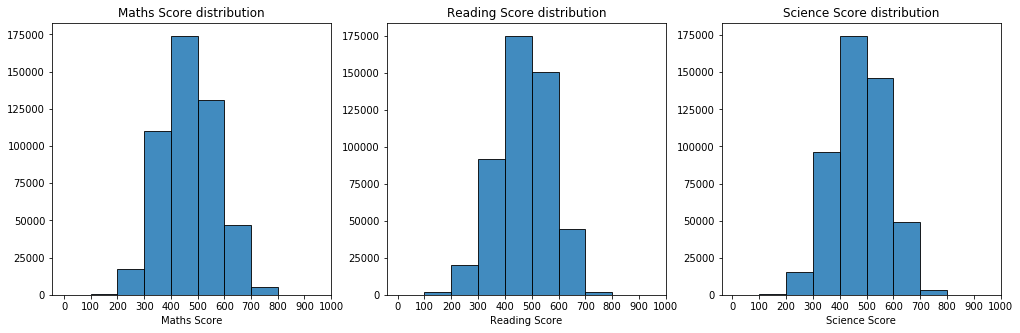

In [46]:
#plotting the histograms 
plt.figure(figsize = [17, 5])

plt.subplot(1,3,1)
bin_edges = np.arange(0, df['Maths_score'].max()+1, 100)
plt.hist(data = df, x = 'Maths_score', bins = bin_edges, ec = 'black', alpha = 0.85)
plt.xticks(np.arange(0, 1000+1, 100))
plt.xlabel('Maths Score')
plt.title("Maths Score distribution")

plt.subplot(1,3,2)
bin_edges = np.arange(0, df['Reading_score'].max()+1, 100)
plt.hist(data = df, x = 'Reading_score', bins = bin_edges, ec = 'black', alpha = 0.85)
plt.xticks(np.arange(0, 1000+1, 100))
plt.xlabel('Reading Score')
plt.title("Reading Score distribution")

plt.subplot(1,3,3)
bin_edges = np.arange(0, df['Science_score'].max()+1, 100)
plt.hist(data = df, x = 'Science_score', bins = bin_edges, ec = 'black', alpha = 0.85)
plt.xticks(np.arange(0, 1000+1, 100))
plt.xlabel('Science Score')
plt.title("Science Score distribution");

>From the above histograms I can conlude that:
 >- The distribution of the scores for Maths, Reading and Science follow normal distribution.
 
 >- A vast majority of students scored between 300 to 600 points in each subject, with a small number of students scored low between 100 to 300 points as well as scored high between 600 to 800.
 
 >- In all the three subjects, maximum students scored between 400 to 500, which is the middle interval of the score range.

### Visualization 2

> In the next visualization, I am interested to figure out students of which countries performed best in this test.

> As from the previous visualization it was seen that the range of the score is in between 100 to 800, I am trying to find out students of the countries who scored above 800 in all the three subjects.

In [26]:
#retrieve entries of students who scored more than 800 in all the three subjects with their countries
high_math_score = df[df['Maths_score'] >800]['Country'].value_counts()
high_reading_score = df[df['Reading_score'] >800]['Country'].value_counts()
high_science_score = df[df['Science_score'] >800]['Country'].value_counts()

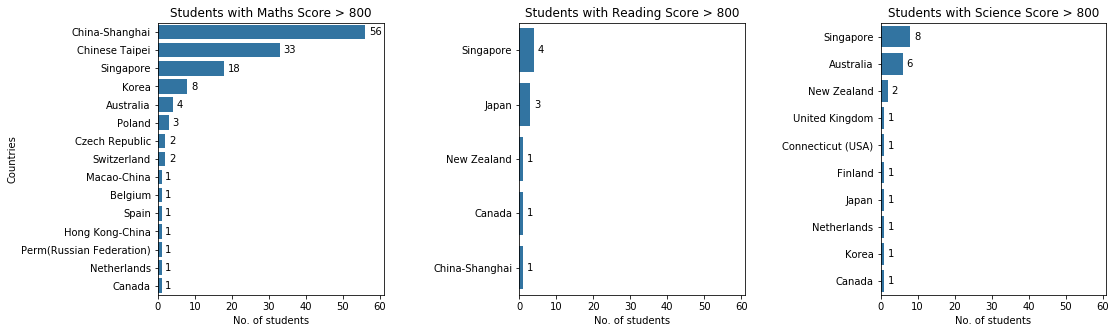

In [35]:
#plotting the horizontal bar chart
plt.figure(figsize = [17, 5])
#adjusting the white space between plots
plt.subplots_adjust(wspace = 0.6)
#to show the text counts properly next to the bars
x_lim_max = high_math_score.values[0]+5

plt.subplot(1,3,1)
base_color = sb.color_palette()[0]
sb.barplot( y = high_math_score.index, x = high_math_score.values, color = base_color)
plt.title('Students with Maths Score > 800')
plt.xlabel('No. of students')
plt.ylabel('Countries')

#write the number of students achieved high score next to the bar
indexes, labels = plt.yticks()
for index, label in zip(indexes, labels):
    plt.text(y = index, x = high_math_score[label.get_text()] +1, 
             s = high_math_score[label.get_text()], va = 'center')
plt.xlim(0, x_lim_max)

plt.subplot(1,3,2)
base_color = sb.color_palette()[0]
sb.barplot( y = high_reading_score.index, x = high_reading_score.values, color = base_color)
plt.title('Students with Reading Score > 800')
plt.xlabel('No. of students')

#write the number of students achieved high score next to the bar
indexes, labels = plt.yticks()
for index, label in zip(indexes, labels):
    plt.text(y = index, x = high_reading_score[label.get_text()] +1, 
             s = high_reading_score[label.get_text()], va = 'center')
plt.xlim(0, x_lim_max)

plt.subplot(1,3,3)
base_color = sb.color_palette()[0]
sb.barplot( y = high_science_score.index, x = high_science_score.values, color = base_color)
plt.title('Students with Science Score > 800')
plt.xlabel('No. of students')

#write the number of students achieved high score next to the bar
indexes, labels = plt.yticks()
for index, label in zip(indexes, labels):
    plt.text(y = index, x = high_science_score[label.get_text()] +1, 
             s = high_science_score[label.get_text()], va = 'center')
plt.xlim(0, x_lim_max);

>In the above analysis, total number of students who have scored very high in Maths, Reading and Science were depicted in the above bar charts. The main findings are:

>- Students from Asian countries like China and Singapore performed exceptionally well with Singapore as the leader in excellency in all the three subjects.

>- Korea and Australia performed well in Maths and Science.

>- A number of European and North American countries made it to the list. Canada is also present in all the three distributions. 

>- Maximum number of students from a range of different countries obtained high score in Maths. This is followed by Science. Few students from only five countries obtained high score in Reading.

### Visualization 3

> In this visualization I am analysing the learning time distribution of each subjects.

> The statistics of the learning time of each subject were obtained first to determine the bin sizes of the distribution.

In [36]:
df['Learning_Time_Language'].describe()

count    282866.000000
mean        219.276636
std          97.997730
min           0.000000
25%         165.000000
50%         200.000000
75%         250.000000
max        2400.000000
Name: Learning_Time_Language, dtype: float64

In [37]:
df['Learning_Time_Maths'].describe()

count    283303.000000
mean        226.007056
std          97.448421
min           0.000000
25%         180.000000
50%         220.000000
75%         250.000000
max        3000.000000
Name: Learning_Time_Maths, dtype: float64

In [38]:
df['Learning_Time_Science'].describe()

count    270914.000000
mean        211.122460
std         131.368322
min           0.000000
25%         120.000000
50%         180.000000
75%         270.000000
max        2975.000000
Name: Learning_Time_Science, dtype: float64

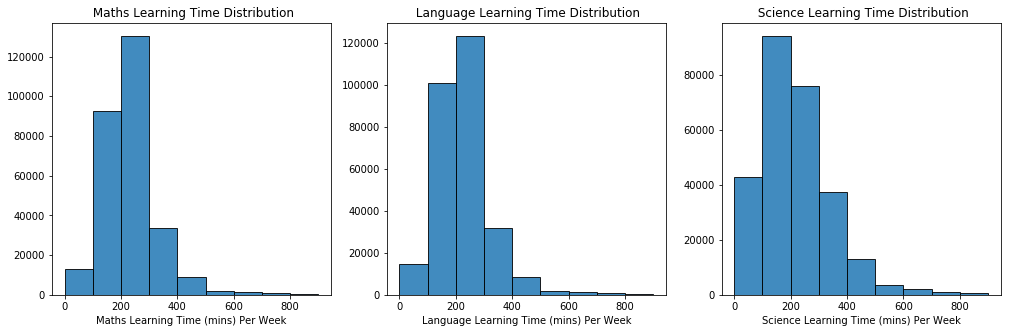

In [48]:
#plotting the histograms
plt.figure(figsize = [17,5])
base_color = sb.color_palette()[0]

plt.subplot(1,3,1)
bin_edges = np.arange(0, 1000, 100)
plt.hist(data = df, x = 'Learning_Time_Maths', bins = bin_edges, color = base_color, ec = 'black', alpha = 0.85)
plt.xlabel('Maths Learning Time (mins) Per Week')
plt.title(' Maths Learning Time Distribution')

plt.subplot(1,3,2)
bin_edges = np.arange(0, 1000, 100)
plt.hist(data = df, x = 'Learning_Time_Language', bins = bin_edges, color = base_color, ec = 'black', alpha = 0.85)
plt.xlabel('Language Learning Time (mins) Per Week')
plt.title(' Language Learning Time Distribution')

plt.subplot(1,3,3)
bin_edges = np.arange(0, 1000, 100)
plt.hist(data = df, x = 'Learning_Time_Science', bins = bin_edges, color = base_color, ec = 'black', alpha = 0.85)
plt.xlabel('Science Learning Time (mins) Per Week')
plt.title(' Science Learning Time Distribution');

> The learning time distribution of the three subjects are shown in the above histograms. The following observations can be gathered from the analysis:

> - All the three distributions are skewed right. 

> - The learning time distribution of Maths and Language are quite similar with the peak between 200 to 300 mins per week.

> - Maximum number of students learning science were spending 100 to 200 mins per week. Overall from the histograms it can be depicted that more number of students were spending time learning Maths and Language than spending time learning Science.

### Visualization 4

> I also want to explore whether the cultural background of students has any effect on the score. Here, I am analyzing the number of students having same cultural background and different cultural background. 

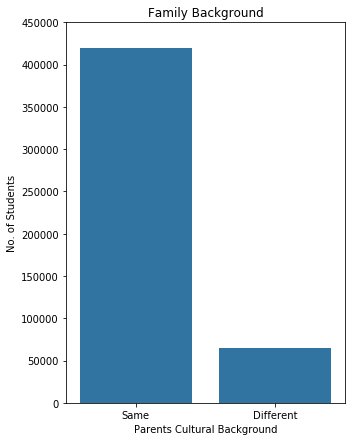

In [20]:
plt.figure(figsize = [5,7])
base_color = sb.color_palette()[0]
sb.countplot(x = 'Parents_Cultural_Background', data = df, color = base_color)
y_ticks = np.arange(0, 450000 + 1, 50000)
plt.yticks(y_ticks, y_ticks);
plt.title('Family Background')
plt.xlabel('Parents Cultural Background')
plt.ylabel('No. of Students');

>It can be seen from the above figure that number of students from same cultural background were almost 7 times more than the students from different cultural background.

## Bivariate Exploration

> In this section, I will investigate the relationships between pairs of variables in the
dataset. 

### Visualization 5

>After the visualization of the global distribution of score, I am interested to know about how individual countries perform in each subject. For this analysis, I am plotting box-plots of the score for each subject according to the countrywise ranking of score.

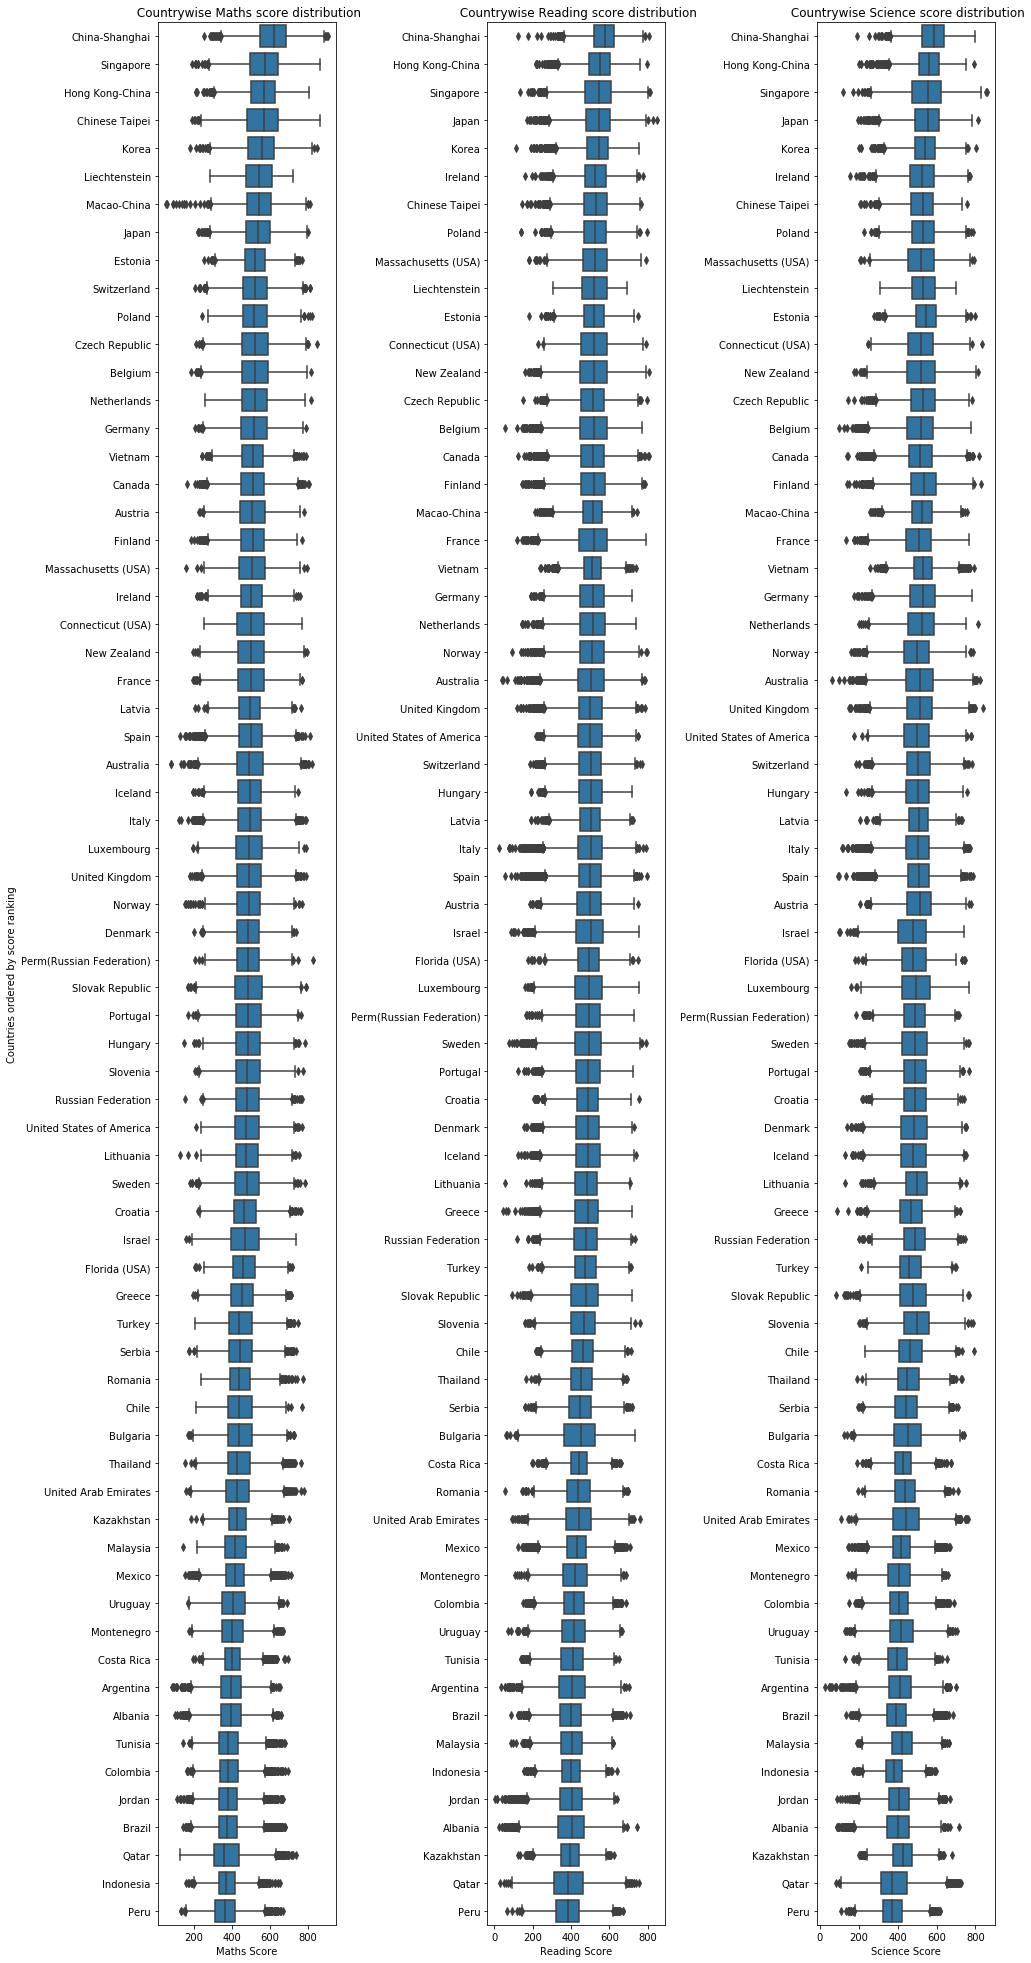

In [105]:
plt.figure(figsize = [15,35])
#adjusting the white space between plots
plt.subplots_adjust(wspace = 0.85)

maths_score_by_country = df.groupby('Country')['Maths_score'].mean().sort_values(ascending = False).index
reading_score_by_country = df.groupby('Country')['Reading_score'].mean().sort_values(ascending = False).index
science_score_by_country = df.groupby('Country')['Science_score'].mean().sort_values(ascending = False).index

base_color = sb.color_palette()[0]
plt.subplot(1,3,1)
sb.boxplot(x = df['Maths_score'], y = df['Country'], order = maths_score_by_country, color = base_color)
plt.xlabel('Maths Score')
plt.ylabel('Countries ordered by score ranking')
plt.title(' Countrywise Maths score distribution');

plt.subplot(1,3,2)
sb.boxplot(x = df['Reading_score'], y = df['Country'], order = reading_score_by_country, color = base_color)
plt.xlabel('Reading Score')
plt.ylabel('')
plt.title(' Countrywise Reading score distribution');

plt.subplot(1,3,3)
sb.boxplot(x = df['Science_score'], y = df['Country'], order = reading_score_by_country, color = base_color)
plt.ylabel('')
plt.xlabel('Science Score')
plt.title(' Countrywise Science score distribution');

> The above analysis depicted that:

>- The Asian countries performed best in all the three subjects with China-Shanghai, Singapore and Hong Kong-China leading the test as the top scored countries. It can also be seen that the mean score obtained in all the three subjects by students of China-Shanghai deviated significantly from the rest of the list. 

>- Poland performed significantly well as it occupied a place within top 10 countries in Reading and Science. In Maths, Poland occupied the 11th position.

>- USA also occupied 9th position in both Reading and Science but in Maths it got the 20th ranking.

>- Singapore and Ireland performed well in the test but from the whiskers and outliers of their box-plots it can be seen that there is a large variation of score obtained by its students.

### Visualization 6

> In this visualization I am interested to know about how the learning time is related to the score obtained in each subject. For this analysis, I am depicting a scatterplot of score obtained against the learning time for each subject.

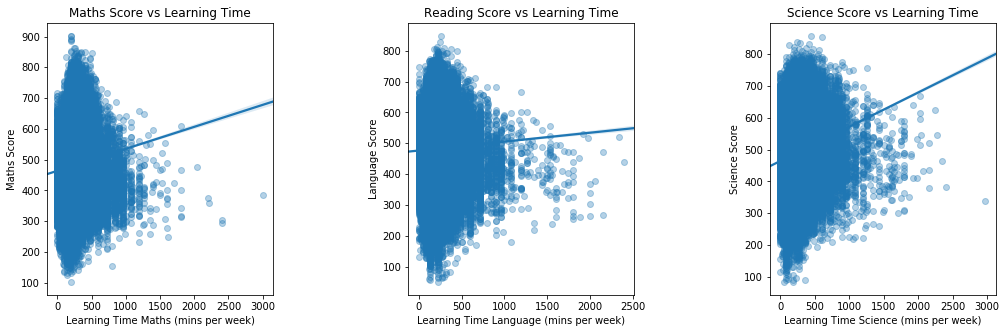

In [85]:
plt.figure(figsize = [17,5])
#adjusting the white space between plots
plt.subplots_adjust(wspace = 0.6)

plt.subplot(1,3,1)
sb.regplot(data = df, x = 'Learning_Time_Maths', y = 'Maths_score', x_jitter = 0.2, y_jitter = 0.2, 
          scatter_kws = {'alpha':1/3})
plt.xlabel('Learning Time Maths (mins per week)')
plt.ylabel('Maths Score')
plt.title('Maths Score vs Learning Time')



plt.subplot(1,3,2)
sb.regplot(data = df, x = 'Learning_Time_Language', y = 'Reading_score', x_jitter = 0.2, y_jitter = 0.2, 
          scatter_kws = {'alpha':1/3})
plt.xlabel('Learning Time Language (mins per week)')
plt.ylabel('Language Score')
plt.title('Reading Score vs Learning Time')



plt.subplot(1,3,3)
sb.regplot(data = df, x = 'Learning_Time_Science', y = 'Science_score', x_jitter = 0.2, y_jitter = 0.2, 
          scatter_kws = {'alpha':1/3})
plt.xlabel('Learning Time Science (mins per week)')
plt.ylabel('Science Score')
plt.title('Science Score vs Learning Time');

>From the scatterplots depicted above it can be seen that:

>- I all the three subjects very few students spent more than 1000 minutes per week learning the subject. Few more students spent time more than 1000 minutes per week learning Reading and Science compared to learning Maths.


>- Although the regression lines for all three scatterplots showed positive linear relationship between the score obtained and learning time but it can also be seen that students who obtained highest score in each subject spent an average of 250 mins per week. This is also true for students who scored lowest in each subject.

### Visualization 7

>To analyze the relationship between learning time and the score obtained in each subject further, I am computing heat maps for each subject.

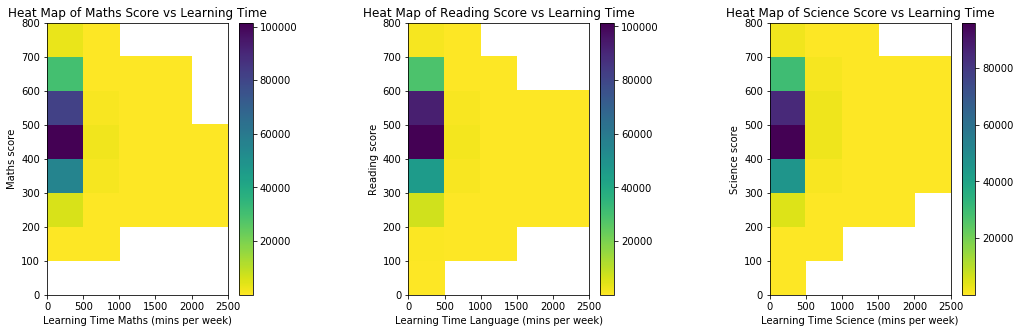

In [84]:
plt.figure(figsize = [17,5])
#adjusting the white space between plots
plt.subplots_adjust(wspace = 0.6)

plt.subplot(1,3,1)
bins_x = np.arange(0, 3000, 500)
bins_y = np.arange(0, 850, 100)
plt.hist2d(data = df, x = 'Learning_Time_Maths', y = 'Maths_score',
           bins = [bins_x, bins_y], cmap = 'viridis_r', cmin = 0.5)
plt.colorbar()
plt.xlabel('Learning Time Maths (mins per week)')
plt.ylabel('Maths score')
plt.title('Heat Map of Maths Score vs Learning Time')

plt.subplot(1,3,2)
bins_x = np.arange(0, 3000, 500)
bins_y = np.arange(0, 850, 100)
plt.hist2d(data = df, x = 'Learning_Time_Language', y = 'Reading_score',
           bins = [bins_x, bins_y], cmap = 'viridis_r', cmin = 0.5)
plt.colorbar()
plt.xlabel('Learning Time Language (mins per week)')
plt.ylabel('Reading score')
plt.title('Heat Map of Reading Score vs Learning Time')


plt.subplot(1,3,3)
bins_x = np.arange(0, 3000, 500)
bins_y = np.arange(0, 850, 100)
plt.hist2d(data = df, x = 'Learning_Time_Science', y = 'Science_score',
           bins = [bins_x, bins_y], cmap = 'viridis_r', cmin = 0.5)
plt.colorbar()
plt.xlabel('Learning Time Science (mins per week)')
plt.ylabel('Science score')
plt.title('Heat Map of Science Score vs Learning Time');

>Some interesting points which can be depicted from the above heat maps are:

>- Maximum number of students scored 400-500 on each individual subject and spent upto 500 mins per week learning it. 


>- In Maths and Reading, students who had scored high score (>700) had spent upto 1000 mins per week. But for Science, students who scored high marks (>700) had spent approximately upto 1500 mins per week.


>- In Reading and Science students who scored lowest (<100) had spent upto 500 mins per week studying. While for Maths, studnets who scored lowest (100-200) had spent upto 1000 mins per week studying.


>So, from the analysis of the correlation between subject score and learning time, it can be seen that the scores obtained were not always dependent on the time the students spent learning. There should be several other factors which were effecting the score.

### Visualization 8

> In this visualization, I am interested to know about if the students' cultural background had any effect on the score obtained. To do this analysis, I am plotting box-plots of the score obtained in individual subjects against parents cultural background (same or different).

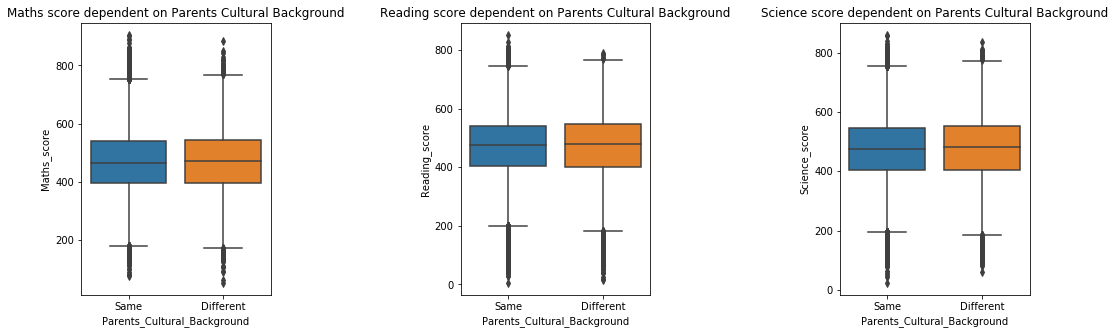

In [92]:
plt.figure(figsize = [17,5])
#adjusting the white space between plots
plt.subplots_adjust(wspace = 1)

plt.subplot(1,3,1)
sb.boxplot(x = df['Parents_Cultural_Background'], y = df['Maths_score'])
plt.title('Maths score dependent on Parents Cultural Background')

plt.subplot(1,3,2)
sb.boxplot(x = df['Parents_Cultural_Background'], y = df['Reading_score'])
plt.title('Reading score dependent on Parents Cultural Background')

plt.subplot(1,3,3)
sb.boxplot(x = df['Parents_Cultural_Background'], y = df['Science_score'])
plt.title('Science score dependent on Parents Cultural Background');

> From the above box-plots it can be seen that:

>- The mean score obtained in all the three subjects by students having same and different cultural backgrounds are same.

>- The interquartile range of the box-plot for each subject is slightly more for students of different cultural background compared to those of same cultural background.

>- The whiskers of the box-plot for each individual subject are more for students of different cultural background compared to students of same cultural background.

## Multivariate Exploration

> in this section, I will investigate the relationship between three or more variables.

### Visualization 9

> In this analysis, I am interested to determine the relationship between the score obtained in all the three subjects. By doing this, it can be seen that students who scored well in one subject, had also scored well in the other subjects.
> For this analysis, I am plotting a pairplot between Maths score, Reading score and Science score.

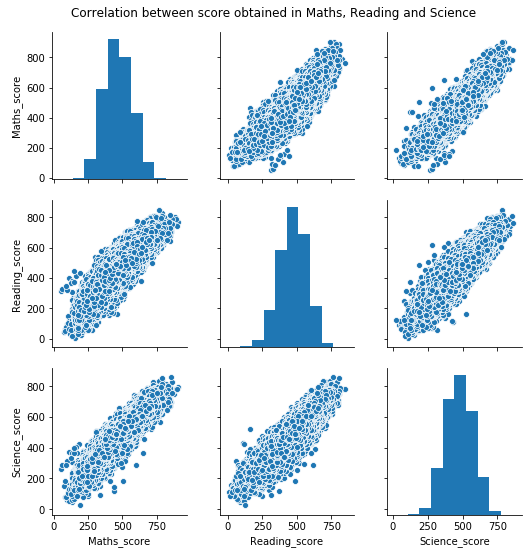

In [90]:
grid = sb.pairplot(data = df, vars = ['Maths_score', 'Reading_score', 'Science_score']);
grid.fig.suptitle("Correlation between score obtained in Maths, Reading and Science", y = 1.02);

> It can be depicted from the above plot that there is a very strong positive correlation between the score obtained by students in each individual subject. So, students who had scored well in one subject, had also scored well in the other two subjects.

### Visualization 10

> Like the previous visuallization, I am curiuos to know about the relationship between the learning time of Maths, Reading ans Science. To analyze this, I am plotting a pair-by-pair relationship between the learning time of the three subjects.

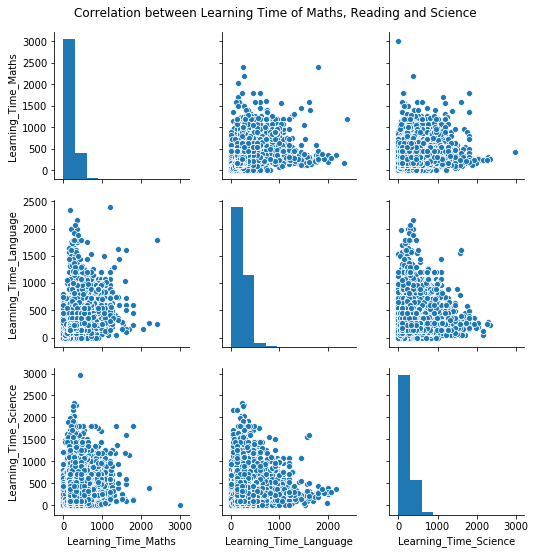

In [95]:
grid = sb.pairplot(data = df, vars = ['Learning_Time_Maths', 'Learning_Time_Language', 'Learning_Time_Science']);
grid.fig.suptitle("Correlation between Learning Time of Maths, Reading and Science", y = 1.02);

>It can be seen from the above visualization that there is no correlation between the learning time of each subject. 

## Conclusion

>From the above analysis and visualization, we can summarize that:

>- In PISA 2012 test, Asian countries performed best in all the three subjects (Maths, Reading and Science) with China as the top performer.

>- Parents Cultural Background had slight effect on the score obtained in the three subjects. Students who come from a different background had shown a little bit higher performance in the test.

>- There was a high correlation between the scores obtained in each individual subject. It can be seen from the visualization that student obtained high score in one subject, achieved high scores in the other two subjects.

>- It was also found that the learning time had not much of an influence on the score obtained. It can be concluded that there cannot be a single factor which influences the score rather than maybe a combination of factors effecting it.